# Normal Distribution and Variability of Sample Means



In today's lab, we will learn about [the variability of sample means](https://inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html) as well as [the normal distribution](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html).


In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *
path_data = '../../../assets/data/'
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')

## Center and Spread
### Center (The Average/Mean)
The `average/mean` is a measure of center.

`Data`: 2, 3, 3, 9 

`Average` = (2+3+3+9)/4 = 4.25

* The average need not be a value in the data
* Need not be a whole number; must not rounnd it!
* It's somewhere in the middle but it doesn't have to be halfway in between
* Same units as the data

### Median vs. Mean
`Median`  : 50th percentile of the data

`Mean(Average)`: balance point of the histogram

If the distribution is symmetric about a value, then that value is both the average and the median

If the histogram is skewed (Non-symmetric), then the mean is pulled away from the median in the direction of the skew (tail)
* Physics analogy: center of gravity



In [2]:
percentile?


In [3]:
births = Table.read_table('baby.csv')
births


Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


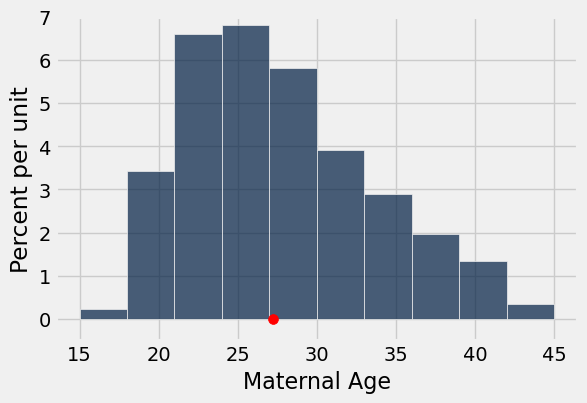

In [3]:
births.hist("Maternal Age")

plots.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50);
plots.ylim(-0.005, 0.07);


From the plot above, we can see that the mean is the center of gravity or balance point of the distribution. 




(-0.005, 0.07)

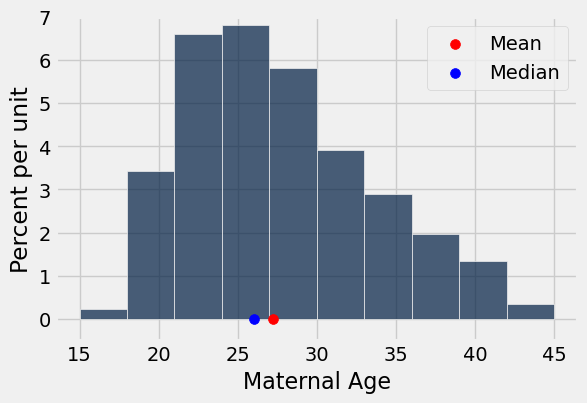

In [4]:
births.hist("Maternal Age")
plots.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50, label="Mean")
plots.scatter(np.median(births.column("Maternal Age")), 0, color='blue', zorder=2, s=50, label="Median")
plots.legend()
plots.ylim(-0.005, 0.07)

* Since the distribution above is right skewed (which means it has a long right tail), we know that the mean of the distribution is larger than the median, which is the “halfway” point of the data. 

* Conversely, if the distribution had been left skewed, we know the mean would be smaller than the median.


In [5]:
values = make_array(2, 3, 3, 9)
values


array([2, 3, 3, 9])

In [6]:
sum(values)/len(values)

4.25

In [7]:
np.average(values)

4.25

In [8]:
np.mean(values)

4.25

In [9]:
2 * 1/4 + 3 * 1/4 + 3 * 1/4 + 9 *1/4

4.25

In [9]:
values_table = Table().with_columns('value', values)
values_table 

value
2
3
3
9


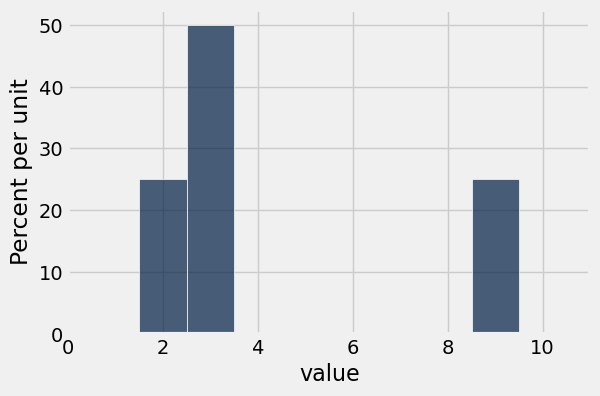

In [10]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display, ec= 'w')

In [12]:
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [13]:
twos = 2 * np.ones(10)
twos

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [14]:
threes = 3 * np.ones(20)
threes

array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.])

In [15]:
nines = 9 * np.ones(10)
nines

array([ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.])

In [16]:
new_vals = np.append(np.append(twos, threes), nines)
new_vals

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.])

In [11]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

In [12]:
len(new_vals)

40

In [13]:
values_table = Table().with_columns('value', new_vals)
values_table

value
2
2
2
2
2
2
2
2
2
2


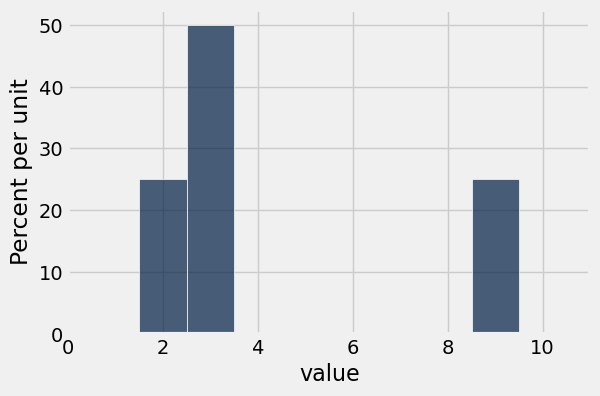

In [14]:
bins = bins_for_display

values_table.hist('value', bins = bins_for_display, ec= 'w')

In [16]:
np.average(new_vals)

4.25

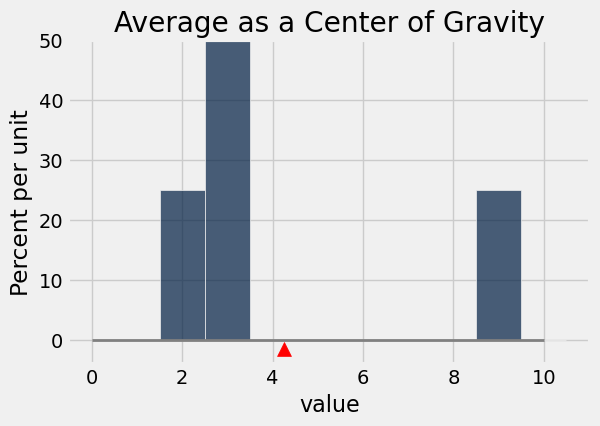

In [17]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)
plots.ylim(-0.04, 0.5)
plots.plot([0, 10], [0, 0], color='grey', lw=2)
plots.scatter(4.25, -0.015, marker='^', color='red', s=100)
plots.title('Average as a Center of Gravity');

In [18]:
nba = Table.read_table('nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


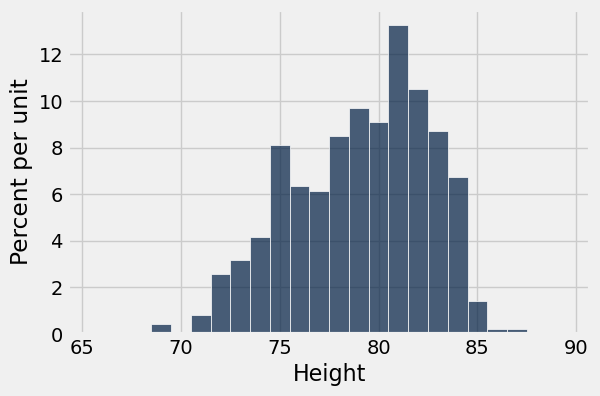

In [19]:
nba.hist('Height', bins = np.arange(65.5,90.5), ec='w')

In [20]:
heights = nba.column('Height')
heights

array([80, 80, 80, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
       79, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78,
       78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77,
       77, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
       76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76,
       76, 76, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74,
       74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73,
       73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 72, 72,
       72, 72, 72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 69, 69, 84, 84,
       84, 84, 84, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83,
       83, 82, 82, 82, 82

The `pth percentile` is first value on the sorted list that is at
least as large as p% of the elements.

s_sorted = [1, 3, 5, 7, 9]

The 80th percentile is ordered element 4: (80/100) * 5

In [26]:
percentile?

In [21]:
percentile(50,heights ), np.average(heights) 


(80, 79.065346534653472)

### How Far from the Average?

The SD of an array is defined as the root mean square of the deviations where the deviations are the difference between the original elements and their average.

* `Standard deviation (SD)` measures roughly how far the data are from their average
* SD = Root Mean Square of Deviations from Average
              
         <-- 5 <-- 4 <-- 3 <-- 2 <--- 1
   
   Also known as the RMS (Root Mean Square)
   
* SD has the same units as the data

### How Big are Most of the Values?

* No matter what the shape of the distribution, the bulk of the data are in the range

### "average +- a few SDs"


In [22]:
sd_values = Table().with_columns('values',values)
sd_values 

values
2
3
3
9


In [23]:
# Step 1. The average.

mean = np.mean(values)
mean


4.25

In [24]:
deviations = values - mean
deviations

array([-2.25, -1.25, -1.25,  4.75])

In [25]:
# Step 2. The deviations from average.

calculation_steps = Table().with_columns(
        'Value', values,
        'Deviation from Average', deviations
        )
calculation_steps


Value,Deviation from Average
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [26]:
sum(deviations)

0.0

In [27]:
np.mean(deviations)

0.0

In [28]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [29]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

7.6875

In [30]:
# Step 5.
# Standard Deviation: root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

2.7726341266023544

In [31]:
np.std(values)

2.7726341266023544

`Chebyshev's Inequality`: 

no matter the shape of the distribution, the proportion of values in the range "mean +- z SDs" is at least 1 - 1/z^2

## Chebyshev’s Bounds

Range	           Proportion	                             
 
average ± 2 SDs	at least 1 - 1/4 = 3/4 (75%)	               

average ± 3 SDs	at least 1 - 1/9 = 8/9 (88.88…%)	           

average ± 4 SDs	at least 1 - 1/16 = 15/16 (93.75%)           	

average ± 5 SDs	at least 1 - 1/25 = 24/25 (96%) 	           

## Standard Units

In the calculations above, the quantity measures standard units, the number of standard deviations above average.

Some values of standard units are negative, corresponding to original values that are below average. Other values of standard units are positive. 

To convert a value to standard units, first find how far it is from average, and then compare that deviation with the standard deviation.

`Z-score`: 

z = (value - average) / SD

Mean + 2SD = 2 standard units

Mean + SD = 1 standard units

Mean = 0 standard units

Mean - SD = -1 standard units

Mean - 2SD = -2 standard units


In [32]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115
108,282,23,67,125
136,286,25,62,93
138,244,33,62,178
132,245,23,65,140
120,289,25,62,125
143,299,30,66,136
140,351,27,68,120


In [33]:
age_mean = np.mean(births.column("Maternal Age")) 
age_mean

27.228279386712096

In [34]:

age_sd = np.std(births.column("Maternal Age"))
age_sd


5.8153604041908968

(-0.005, 0.07)

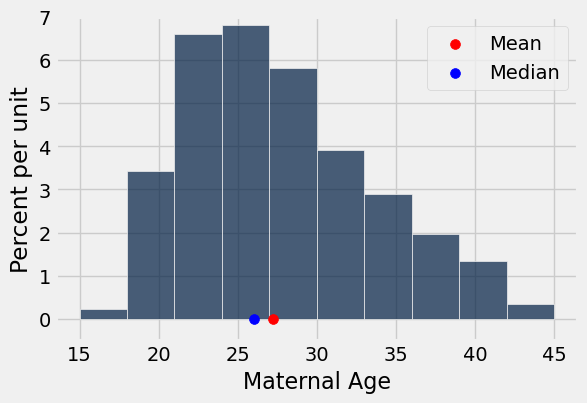

In [41]:
births.hist("Maternal Age")
plots.scatter(np.mean(births.column("Maternal Age")), 0, color='red', zorder=2, s=50, label="Mean")
plots.scatter(np.median(births.column("Maternal Age")), 0, color='blue', zorder=2, s=50, label="Median")
plots.legend()
plots.ylim(-0.005, 0.07)

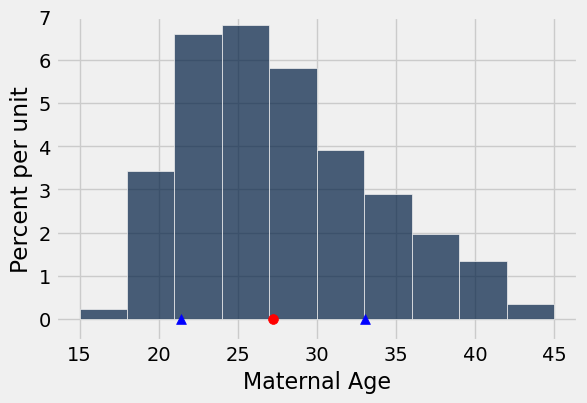

In [42]:
age_mean = np.mean(births.column("Maternal Age")) 
age_sd = np.std(births.column("Maternal Age"))
births.hist("Maternal Age")

plots.scatter(age_mean, 0, color='red', zorder=2, s=50);
plots.scatter(age_mean+age_sd, 0, marker='^', color='blue', zorder=2, s=50);
plots.scatter(age_mean-age_sd, 0, marker='^', color='blue', zorder=2, s=50);
plots.ylim(-0.005, 0.07);

In [35]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

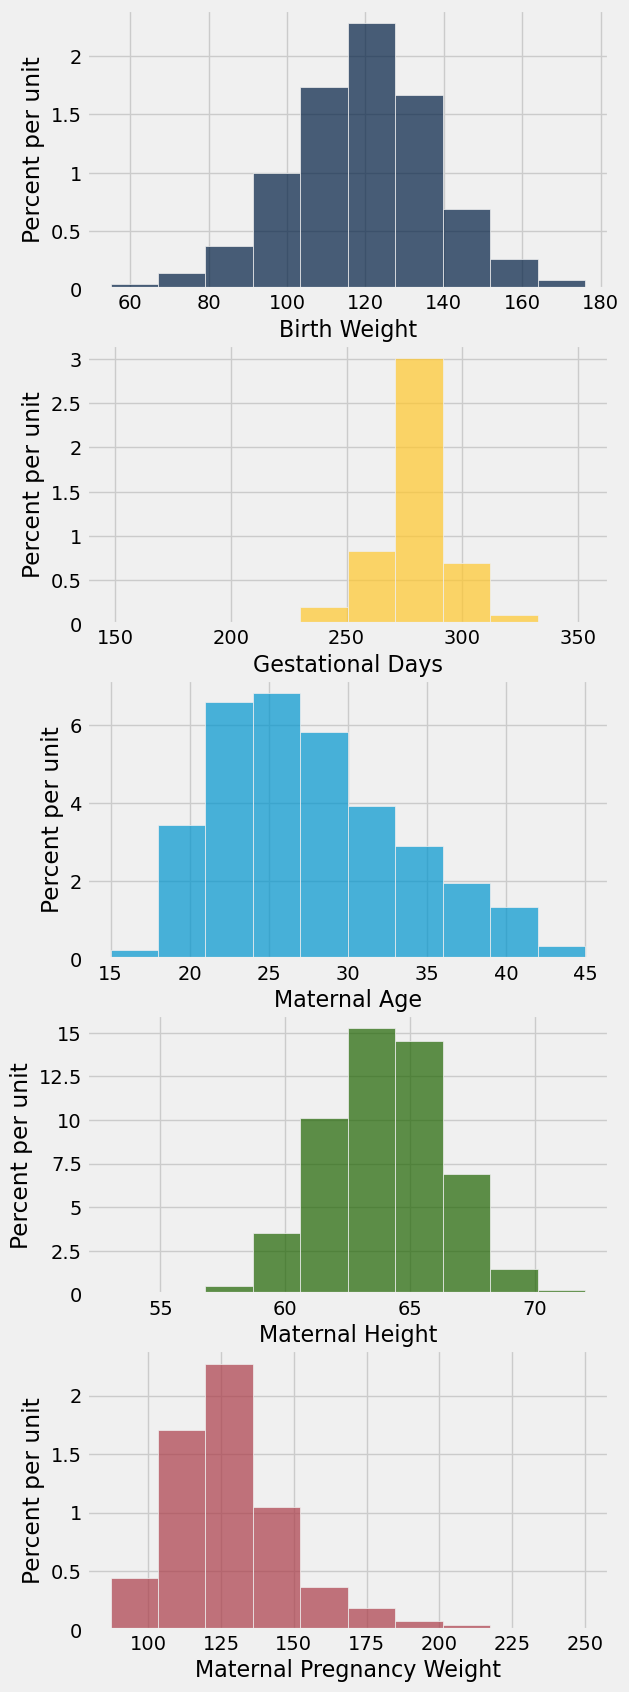

In [36]:
births.hist(overlay = False)

In [37]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [41]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))
within_3_SDs

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115
108,282,23,67,125
136,286,25,62,93
138,244,33,62,178
132,245,23,65,140
120,289,25,62,125
143,299,30,66,136
140,351,27,68,120


In [38]:
 births.num_rows

1174

In [42]:
within_3_SDs.num_rows

1158

In [43]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [48]:
# Chebyshev's bound: 
# This proportion should be at least

1 - 1/3**2

0.8888888888888888

In [49]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5 SDs: 99.91 %


### Standard Units

#### standard units = (original value - mean) / SD

<img src="Lecture 25_ Center and Spread.jpg" alt="drawing" width="500"/>



In [47]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [48]:
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [49]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [50]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [54]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [51]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

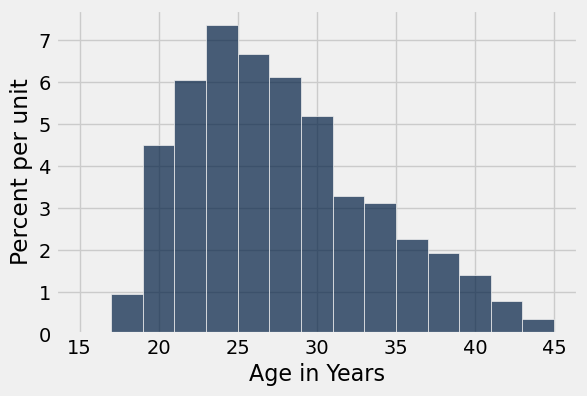

In [56]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

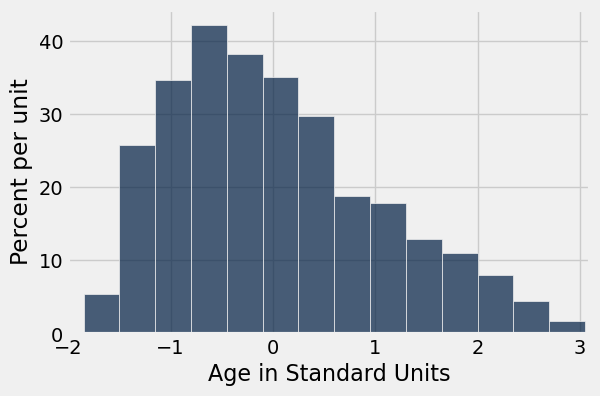

In [57]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

### The SD and Bell Shaped Curves

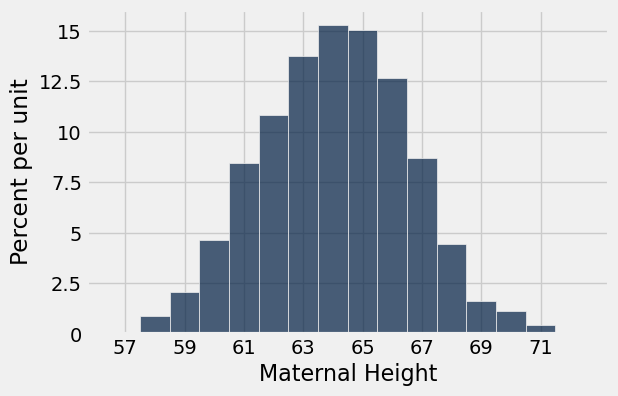

In [52]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

Estimates by eye

The average is approximately:

Locate the point of inflection on the right. The SD is approximately:

In [59]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

## The Normal Distribution


When we visualize the distribution of a sample, we are often interested in the mean and the standard deviation of the sample. 

These two sample statistics can give us a bird’s eye view of the distribution -- by letting us know where the distribution sits on the number line and how spread out it is, respectively
### The SD and Bell-Shaped Curves
* Usually, it's nto easy to estimate the SD by looking at a histogram, but if the histagram has a bell shape, then you can!

* If the histogram has a bell shape:
    
    The average is at the center
    
    The SD is the distance between the avreage and the points of inflection on either side



## Central Limit Theorem
* The Central Limit Theorem describes how the normal distribution (a bell-shaped curve) is connected to random sample averages.
* We care about sample averages because they estimate population averages.

If the sample is...
* large
* drawn at random with repalcement

... then, regardless of the distribution of the population, `the probability distribution of the sample average is roughly normal`.



### How Accurate is the Sample Mean?

In short, the smaller the SD, the more accurate the estimate of the sample mean as an estimate of the population mean

Why is this? The population SD is a constant, so variability of the sample mean decreases as the sample mean increases


In [53]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


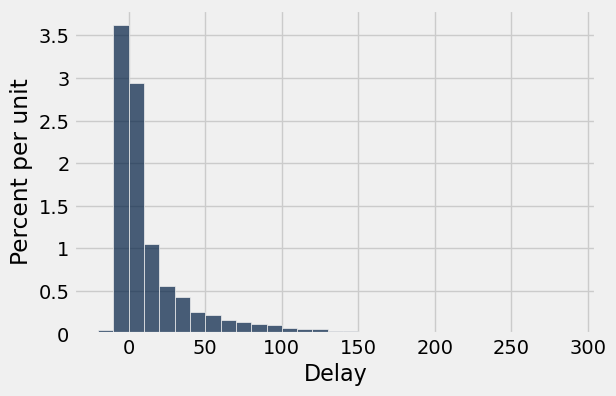

In [54]:
united.hist('Delay', bins=united_bins)

In [55]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [56]:
percentile(50, delays)

2

In [57]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [58]:
one_sample_mean(100)

12.859999999999999

In [59]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [60]:
sample_means_100 = ten_thousand_sample_means(100)

In [61]:
len(sample_means_100)

10000

Population Average: 16.6581555154


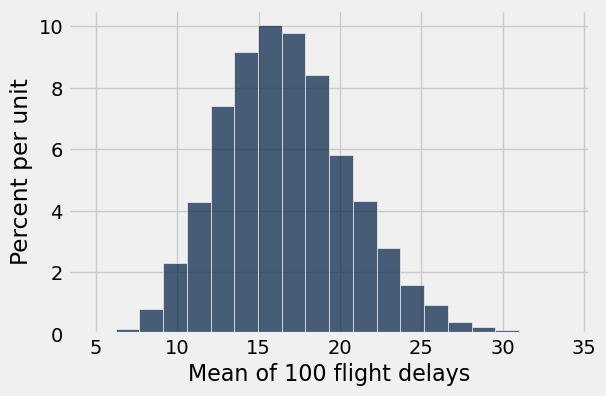

In [62]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

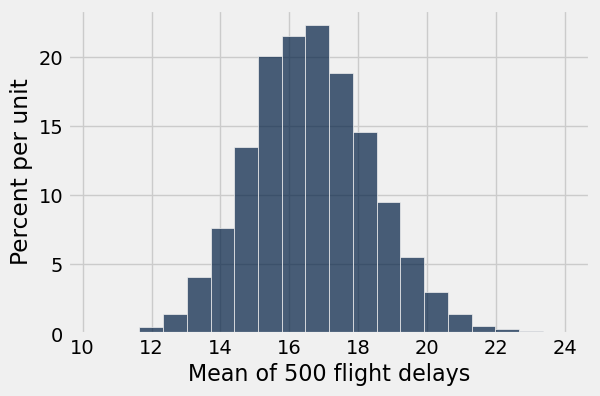

In [63]:
sample_means_500 = ten_thousand_sample_means(500)
Table().with_column('Mean of 500 flight delays', sample_means_500).hist(bins=20)

In [64]:
united.num_rows

13825

In [72]:
# How many possible sample means are there?
united.num_rows ** 500

2150651237835806708297273426035479600152121278263354854749683047597839202346303956865975903612584405994349534711882652620649409045089753205846914338186151722146796416499635421135774355389352146516377522482989859921756314016822454879839718509017413441036793639470544165429873191612403181851275088139159119236606639564907734824547568070149440790541578131581538956328166653842573781074850641418389859289016052764529408398849394115631760140215834053537549252693622747303417082402051090128545224165406043994214731387819432222245304887342115032714375928808238664559203473388548057161408363842593468086802922231062789420113327952927669326754048073891332452460186969008421458782980925297866458277880698230320124002827090750934443325060344228941664480780045153293064141992618861867795849484747832371630056525720355991564960700561323066478076000280361784770184309879590106730932984193637466525692994869405943710626544994339435060272015391996383016063838506876036868200103740893772004092794903259612698167954317

## CLT: Center

Population Average: 16.6581555154


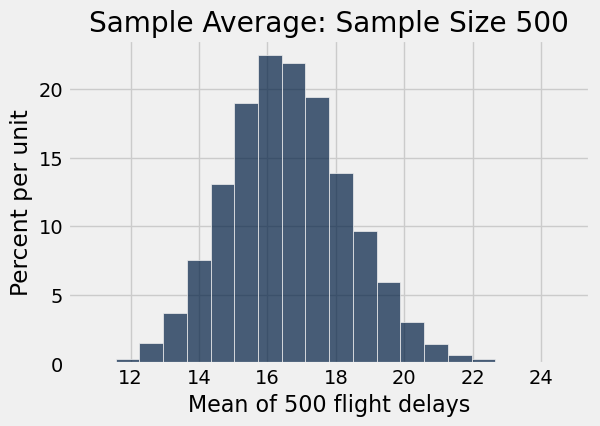

In [73]:
delay_mean = np.average(united.column('Delay'))
sample_means_500 = ten_thousand_sample_means(500)
Table().with_column('Mean of 500 flight delays', sample_means_500).hist(bins=20)
print('Population Average:', delay_mean)
plots.title('Sample Average: Sample Size 500');